# Candidate Test 2022 Analysis

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- PCA or some other dimensionality reduction technique to plot responses in two dimensions, thereby visualizing the "political landscape". The coloros of the plotted points should match the political party colors (see below).
- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



Load Dataset

In [258]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


In [259]:
alldata = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')


Data Set analysis

In [260]:
# alldata
# display(alldata.columns)

# drdata
# display(drdata)

# drq
display(drq)

# tv2data

# tv2q
display(tv2q)

# electeddata
display(electeddata)
print(electeddata.columns)

print(type(drq['ID'][0]))

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke to...,NaN,Den kollektive trafik bør være billig og tilgæ...,Det er dyrt for statskassen at opretholde drif...,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,NaN,Historisk rammer kriser de fattigste hårdest. ...,Det danske samfund er et af de mest lige samfu...,0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder ska...,NaN,Den mest effektive måde at stoppe bandekrimina...,"Det er urimeligt, at den samme forbrydelse ska...",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertall...",Danmark er bedst tjent med at være en del af E...,0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år...",NaN,Ruslands angreb på Ukraine har ændret alting o...,Vi er medlemmer af Nato og har i forvejen et s...,0,1,FT,NaN
5,537,VELFÆRD,"Det er okay, at den økonomiske ulighed stiger,...",NaN,Økonomisk ulighed afspejler belønningen den en...,Større økonomisk ulighed vil skævvride samfund...,0,1,FT,NaN
6,538,UDDANNELSE,Forældres indkomst skal være et af kriterierne...,NaN,Det er vigtigt at vores gymnasier består af un...,De unge risikerer at miste pladsen på deres næ...,0,1,FT,NaN
7,540,VELFÆRD,Det skal være muligt at tjene penge på at driv...,NaN,Der er brug for en bred vifte af forskellige d...,Skattekroner tiltænkt velfærd skal ikke kunne ...,0,1,FT,NaN
8,541,ARBEJDSMARKED OG ØKONOMI,Der skal indføres skat på fortjenesten ved sal...,NaN,"Det er kun rimeligt, at man betaler skat af st...","Det er mere sikkert for alle, at boligejere be...",0,1,FT,NaN
9,543,VELFÆRD,"Det er en god idé, at dagpengesatsen for nyudd...",NaN,De fleste nyuddannede er yngre mennesker uden ...,Som nyuddannet er man ofte ved at etablere sig...,0,1,FT,NaN


,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}
...,...,...,...,...,...
69,10b,rate,Socialområdet,"Den såkaldte Arne-pension, der giver mulighed ...",NaN
70,11a,rate,Mink-sagen,Der har været alt for meget fokus på Mette Fre...,NaN
71,11b,rate,Mink-sagen,"Det bør undersøges, om Mette Frederiksen kan s...",NaN
72,12a,rate,Coronavirus,"Hvis coronasmitten stiger markant til vinter, ...",NaN


,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,1,2,-2,2,-1,1,-1,-1,1,...,0,-1,1,2,1,-2,1,0,Københavns Omegns Storkreds,41
165,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,1,-2,1,1,Københavns Omegns Storkreds,33
166,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
167,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52


Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
       'alder'],
      dtype='object')
<class 'numpy.int64'>


In [261]:
def printNullValues():
    print("********************** all data **********************")
    print(alldata.isnull().sum())
    
    print("********************** all data **********************")
    print(drdata.isnull().sum())
    
    print("********************** drq **********************")
    print(drq.isnull().sum())
    
    print("********************** tv2 data **********************")
    print(tv2data.isnull().sum())
    
    print("********************** tv2q **********************")
    print(tv2q.isnull().sum())
    
    print("********************** elected data **********************")
    print(electeddata.isnull().sum())
printNullValues()
display(drdata)

********************** all data **********************
530          0
531          0
533          0
534          0
535          0
537          0
538          0
540          0
541          0
543          0
544          0
545          0
546          0
547          0
548          0
550          0
551          0
552          0
553          0
555          0
556          0
557          0
559          0
561          0
563          0
navn         0
parti        0
1a           0
1b           0
2a           0
2b           0
3a           0
3b           0
4a           0
4b           0
5a           0
5b           0
6a           0
6b           0
7a           0
7b           0
8a           0
8b           0
9a           0
9b           0
10a          0
10b          0
11a          0
11b          0
12a          0
12b          0
storkreds    0
alder        0
dtype: int64
********************** all data **********************
530      0
531      0
533      0
534      0
535      0
537      0
538      0
540  

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1,1,1,-2,2,-1,1,-2,1,1,...,-1,1,1,-2,2,0,2,1,Maria Gudme,Socialdemokratiet
900,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,2,1,-1,-2,2,2,-1,1,Maria Durhuus,Socialdemokratiet
901,1,1,1,-2,2,-1,1,-1,-1,1,...,1,2,2,-2,1,1,1,1,Morten Bødskov,Socialdemokratiet
902,1,-1,1,-2,1,-1,-1,-1,-1,1,...,1,-1,1,-2,1,1,1,1,Jeppe Bruus,Socialdemokratiet


PCA or some other dimensionality reduction technique to plot responses in two dimensions, thereby visualizing the “political landscape”. The colors of the plotted points should match the political party colors (see below).

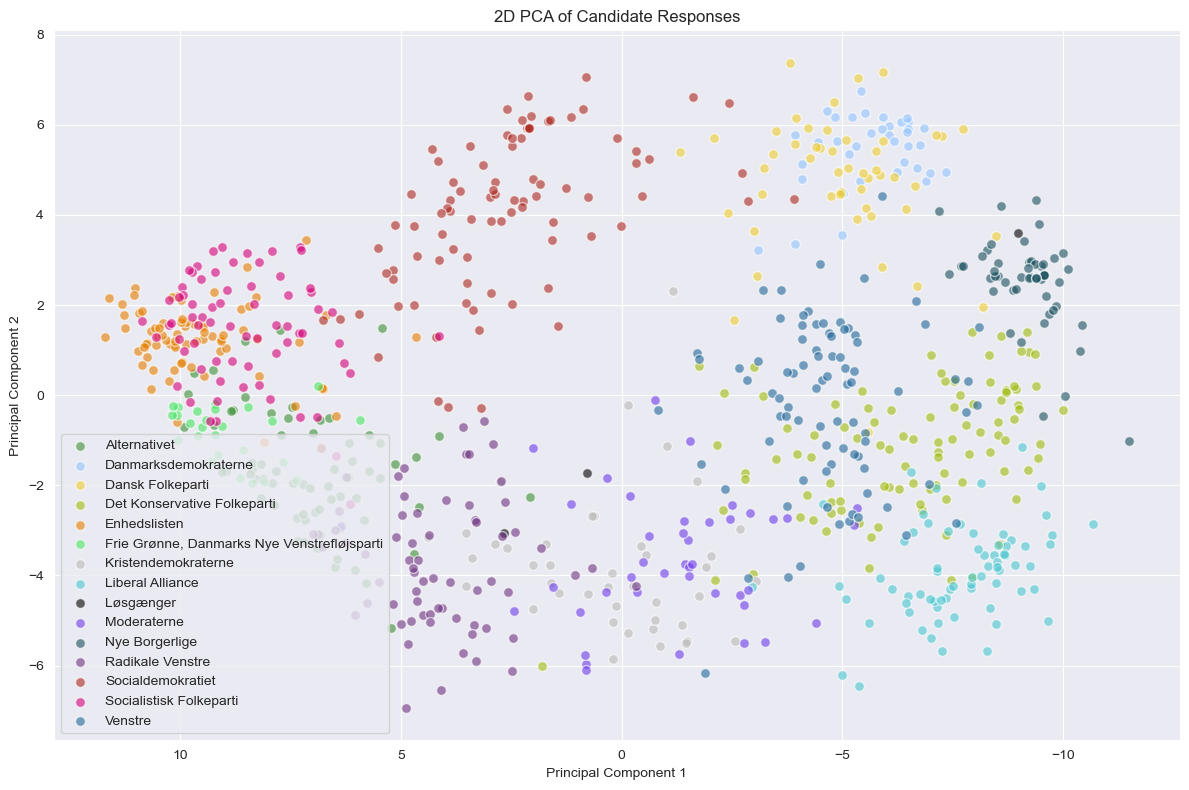

In [262]:
# Use alldata for PCA, but scale the data first
# Use parti as colour of the data points

df = alldata

X = df.drop(columns=['parti', 'navn', 'alder', 'storkreds'])

pca = PCA(n_components=2)

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_pca = pca.fit_transform(X_scaled)

X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

df_pca['parti'] = df['parti']
party_colors = {
    "Alternativet" : "#3b8f34",
    "Danmarksdemokraterne": "#92c4ff",
    "Dansk Folkeparti": "#efcc2f",
    "Det Konservative Folkeparti": "#a0ba0a",
    "Enhedslisten": "#e57f00",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#49e663",
    "Kristendemokraterne": "#bababa",
    "Liberal Alliance": "#4ac6d0",
    "Løsgænger": "#000000",
    "Moderaterne": "#6c3be9",
    "Nye Borgerlige": "#184f5d",
    "Radikale Venstre": "#6e3282",
    "Socialdemokratiet": "#ab251d",
    "Socialistisk Folkeparti": "#d40078",
    "Venstre": "#206799",
}

fig, ax = plt.subplots(figsize=(12, 8))

# Plot each party's points separately to have individual control over colors and legends
for party, color in party_colors.items():
    subset = df_pca[df_pca['parti'] == party]
    ax.scatter(subset['PC1'], subset['PC2'], c=color, label=party, alpha=0.6, edgecolors='w', s=50)

ax.set_title('2D PCA of Candidate Responses')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(loc='best')
ax.invert_xaxis()
plt.tight_layout()
plt.show()


- An analysis/description of which questions are most crucial concerning their placement on the axes.

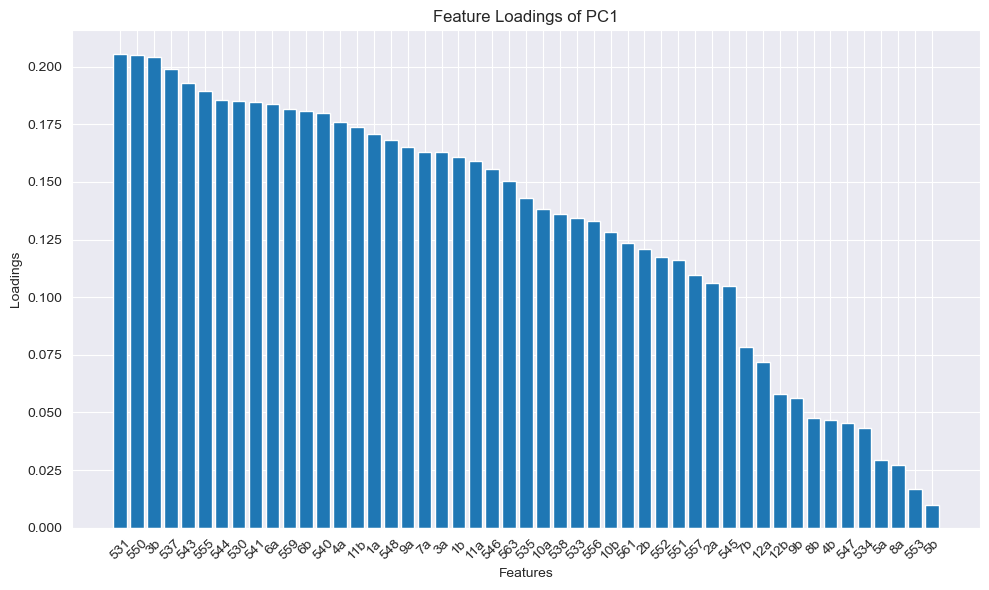

Feature Loadings of PC1
Index: 0, Importance: 0.20541612059304046, Question: Der skal indføres en særlig skat på de allerhøjeste indkomster, Id: 531
Index: 1, Importance: 0.20506631450800106, Question: Der skal indføres kvoter, der sikrer mindst 30 procent kvinder i virksomheders bestyrelser, Id: 550
Index: 2, Importance: 0.20407517128033686, Question: Ulandsbistanden bør hæves., Id: 3b
Index: 3, Importance: 0.19888332234510603, Question: Det er okay, at den økonomiske ulighed stiger, så længe danskerne generelt bliver rigere, Id: 537
Index: 4, Importance: 0.19305722482996077, Question: Det er en god idé, at dagpengesatsen for nyuddannede er sat ned, Id: 543
Index: 5, Importance: 0.1895538403393235, Question: Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles, Id: 555
Index: 6, Importance: 0.18530420602677922, Question: Transkønnede under 18 år skal have mulighed for juridisk kønsskifte (skifte cpr-nummer), Id: 544
Index: 7, Importance: 0.1

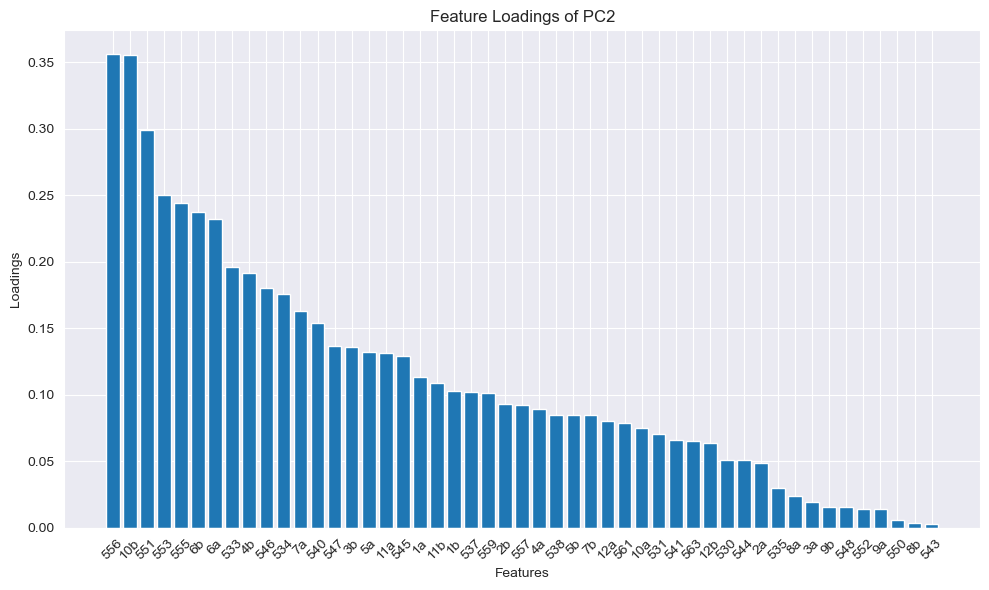

Feature Loadings of PC2
Index: 0, Importance: 0.35604855327850166, Question: Den såkaldte Arne-pension skal afskaffes, Id: 556
Index: 1, Importance: 0.35500375682455293, Question: Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft., Id: 10b
Index: 2, Importance: 0.2988956770625412, Question: Der skal være permanent grænsekontrol mellem Danmark og Tyskland, Id: 551
Index: 3, Importance: 0.24988482908304238, Question: Der skal udflyttes flere uddannelsespladser fra de store byer, Id: 553
Index: 4, Importance: 0.24398159842029207, Question: Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles, Id: 555
Index: 5, Importance: 0.23732195446891613, Question: Det vil være en god idé at etablere et dansk asylmodtagecenter i Rwanda., Id: 6b
Index: 6, Importance: 0.23234942793690977, Question: Den danske udlændingepolitik er for stram., Id: 6a
Index: 7, Importance: 0.1962179962550980

In [263]:
def plotLoadings(loadings, title):
    features = list(X.columns)

    sorted_indices = abs(loadings).argsort()[::-1]
    sorted_loadings = abs(loadings[sorted_indices])

    sorted_features = [features[i] for i in sorted_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_features, sorted_loadings)
    plt.xlabel('Features')
    plt.ylabel('Loadings')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    top10loadings = sorted_loadings[:10]
    top10features = sorted_features[:10]

    print(title)
    for i, feature in enumerate(top10features):
        importance = top10loadings[i]
        if feature.isnumeric():
            question = drq.loc[drq['ID'] == int(feature)].Question.iloc[0]
        else:
            question = tv2q.loc[tv2q['id'] == feature].question.iloc[0]

        print(f"Index: {i}, Importance: {importance}, Question: {question}, Id: {feature}")

plotLoadings(pca.components_[0], "Feature Loadings of PC1")
plotLoadings(pca.components_[1], "Feature Loadings of PC2")

- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.

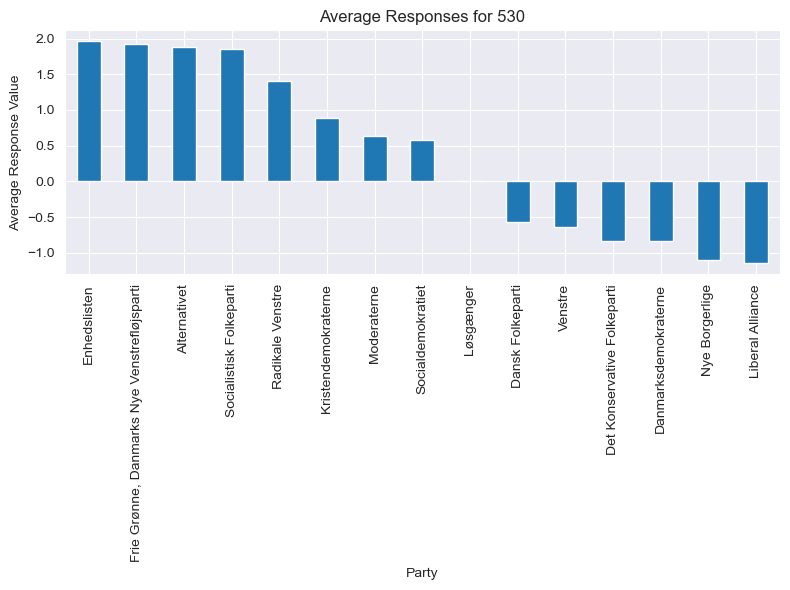

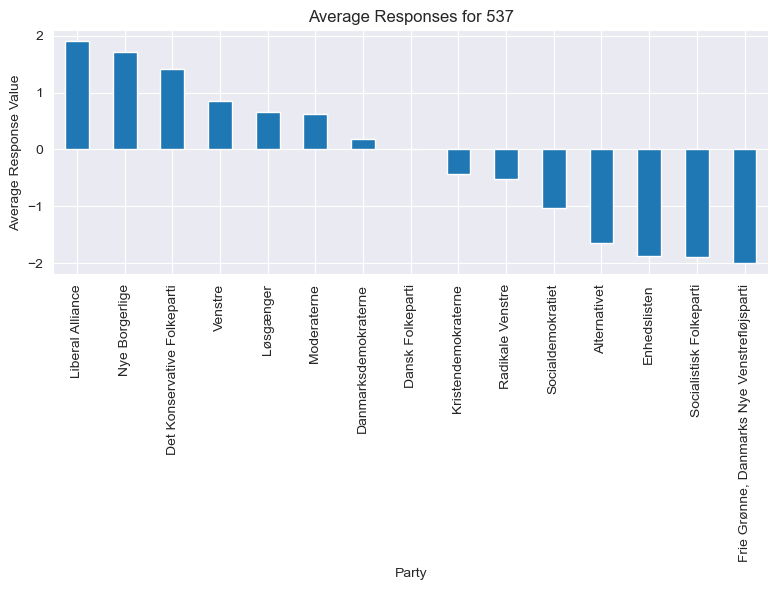

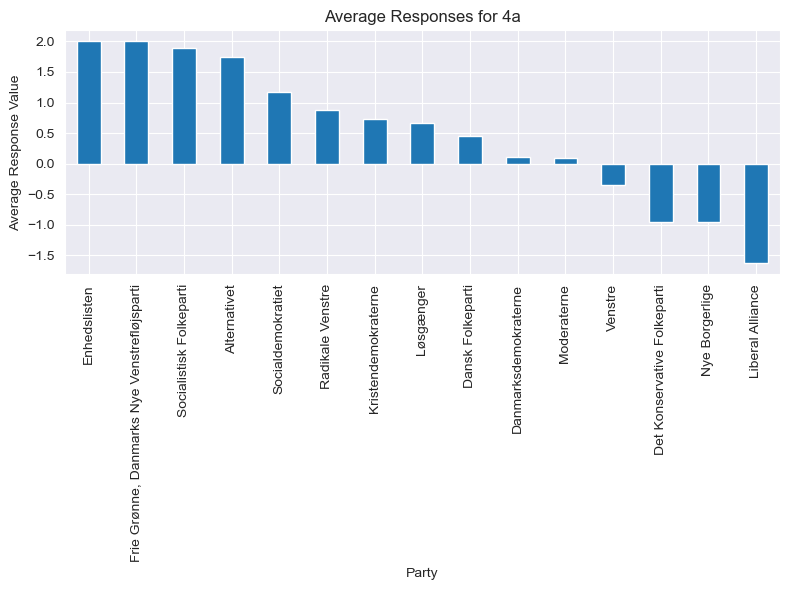

In [264]:
dfNumericWithParti = df.drop(columns=['navn', 'storkreds', 'alder'])

grouped = dfNumericWithParti.groupby('parti').mean()

for question in ['530', '537', '4a']:
    sorted_question = grouped.sort_values(by=question, ascending=False)

    sorted_question[question].plot(kind='bar', figsize=(8, 6))

    plt.title(f'Average Responses for {question}')
    plt.ylabel('Average Response Value')
    plt.xlabel('Party')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

- Age of the candidates grouped by parties.

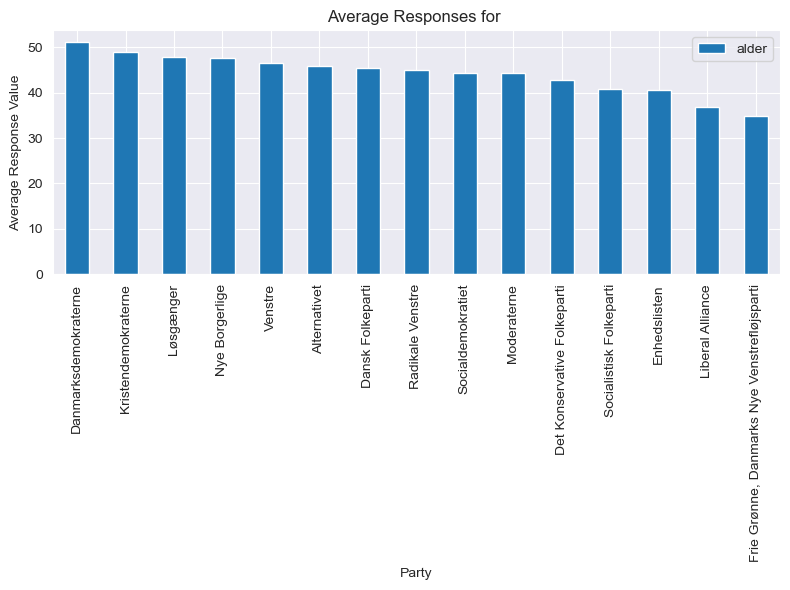

In [265]:
dfAgeParty = df[['alder', 'parti']]


grouped = dfAgeParty.groupby('parti').mean()

sorted_ages = grouped.sort_values(by='alder', ascending=False)

sorted_ages.plot(kind='bar', figsize=(8, 6))
plt.title(f'Average Responses for ')
plt.ylabel('Average Response Value')
plt.xlabel('Party')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

In [266]:
dfQuestionsWithName = df.drop(columns=['parti','storkreds', 'alder'])

dfQuestionsWithName = dfQuestionsWithName.set_index('navn')
dfQuestionsWithName['total'] = dfQuestionsWithName.sum(axis=1)
dfSorted = dfQuestionsWithName.sort_values(by='total', ascending=False)
top_candidates = dfSorted.head()
bottom_candidates = dfSorted.tail()

print("Top candidates with highest sum values:")
print(top_candidates)

print("\nTop candidates with lowest sum values:")
print(bottom_candidates)

Top candidates with highest sum values:
                             530  531  533  534  535  537  538  540  541  543  \
navn                                                                            
Nicklas Gjedsig Larsen         2    1   -2   -1    1    1    1    1    1   -2   
Henrik Engelbrekt Refshauge    1    2   -1   -2    1   -2    1    2   -1    1   
Jesper Callesen                2    1   -2   -2    2   -2   -1    2    2   -2   
Anna Thusgård                  2    1    1   -2    2   -2    1   -1    2   -1   
Børge Rostgaard Winkel         2   -1   -2   -2    2    2   -1    1    1    1   

                             ...  8b  9a  9b  10a  10b  11a  11b  12a  12b  \
navn                         ...                                             
Nicklas Gjedsig Larsen       ...   2  -2   2    2    2    2   -1    2    0   
Henrik Engelbrekt Refshauge  ...   2  -1   2    2    2   -2    2    1    2   
Jesper Callesen              ...   2   0   2    1    2   -2    2    1   -2   
An

- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

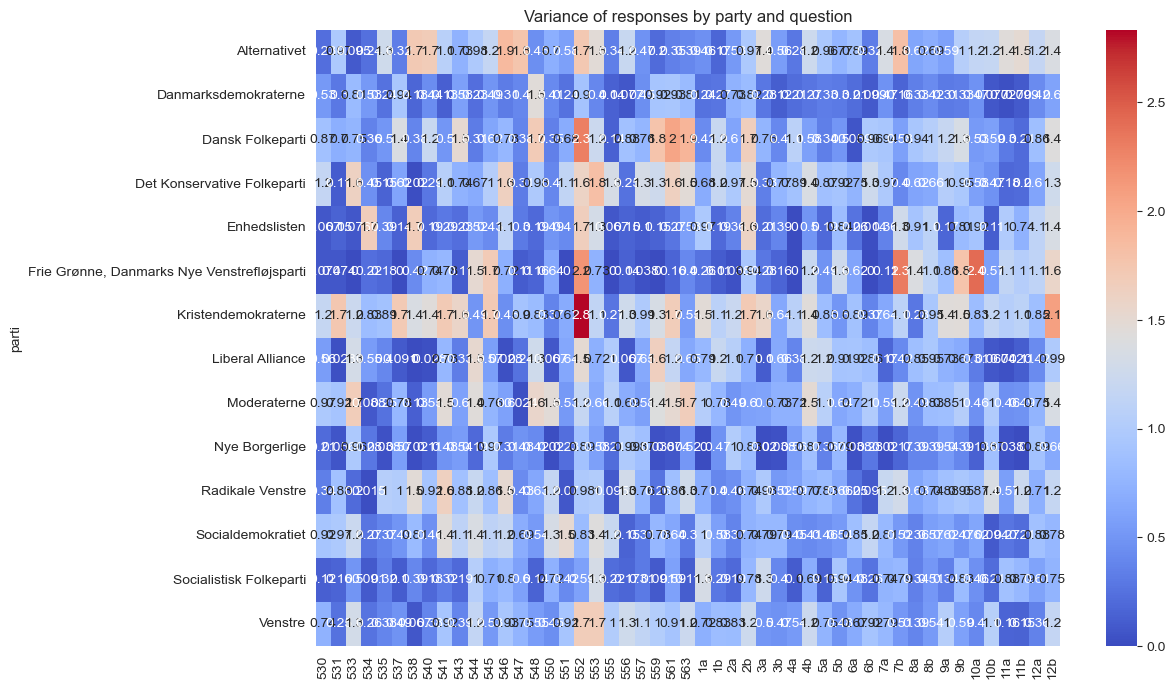

Parties with the most internal disagreements


parti
Kristendemokraterne            54.930314
Alternativet                   44.522388
Dansk Folkeparti               42.531463
Det Konservative Folkeparti    42.482117
Moderaterne                    41.904762
dtype: float64

In [267]:
# Inter Party Differences
variance_data = df.drop(columns = ['alder', 'navn', 'storkreds']).groupby('parti').var()

# Remove independent politcians, as these should not have similiar answers
variance_data = variance_data.drop('Løsgænger', axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(variance_data, cmap='coolwarm', annot=True)
plt.title('Variance of responses by party and question')
plt.show()

df[df['parti'] == 'Løsgænger'].sort_values(by='555', ascending=False)

print('Parties with the most internal disagreements')
variance_per_party = variance_data.sum(axis=1).sort_values(ascending=False)
variance_per_party.head()

Intra Party Differences

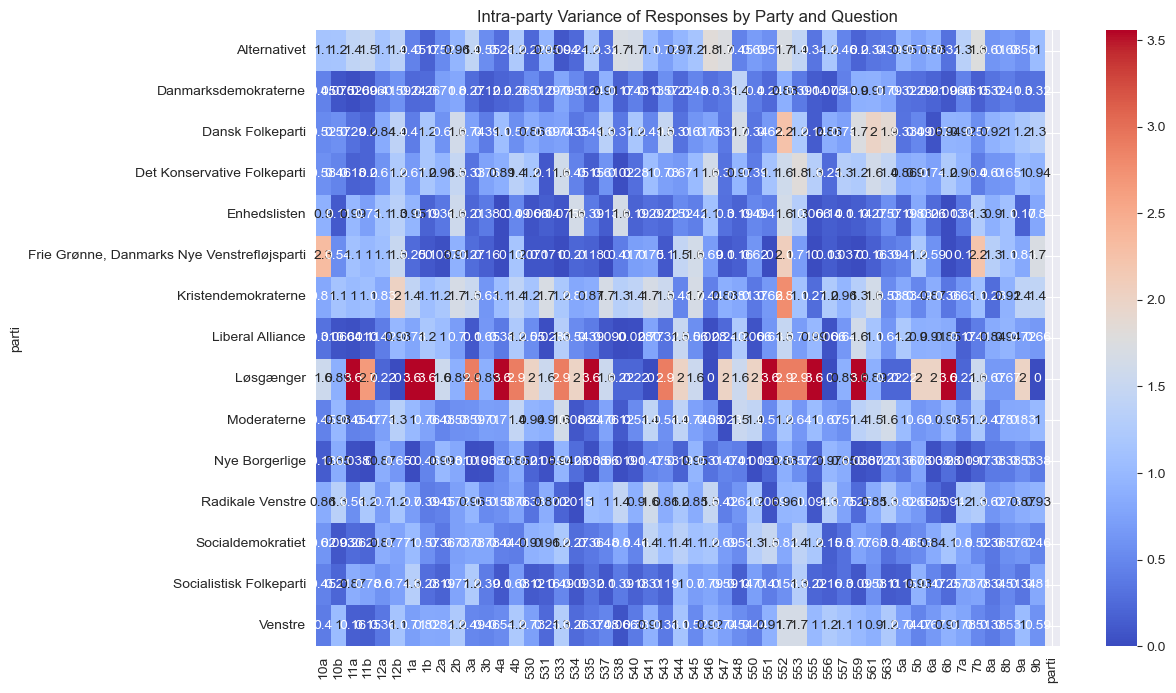

Parties with the most internal disagreements (Intra-party)
parti
Løsgænger                      86.000000
Kristendemokraterne            53.622449
Alternativet                   43.857875
Det Konservative Folkeparti    42.048626
Dansk Folkeparti               41.663474
dtype: float64


In [268]:
party_means = df.drop(columns=['alder', 'navn', 'storkreds']).groupby('parti').mean()

squared_diffs = df.drop(columns=['alder', 'navn', 'storkreds']).apply(lambda row: (row - party_means.loc[row['parti']])**2, axis=1)

intra_party_variance = squared_diffs.groupby(df['parti']).mean()

plt.figure(figsize=(12, 8))
sns.heatmap(intra_party_variance, cmap='coolwarm', annot=True)
plt.title('Intra-party Variance of Responses by Party and Question')
plt.show()

print('Parties with the most internal disagreements (Intra-party)')
intra_variance_per_party = intra_party_variance.sum(axis=1).sort_values(ascending=False)
print(intra_variance_per_party.head())


- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**.


In [269]:
X = df.drop(columns=['navn', 'parti', 'storkreds', 'alder'])
y = df['parti']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

In [270]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

                                             precision    recall  f1-score   support

                               Alternativet       0.43      0.46      0.44        13
                       Danmarksdemokraterne       0.75      0.86      0.80         7
                           Dansk Folkeparti       0.64      0.70      0.67        10
                Det Konservative Folkeparti       0.62      0.50      0.56        20
                               Enhedslisten       1.00      0.87      0.93        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.43      0.60      0.50         5
                        Kristendemokraterne       0.60      0.38      0.46         8
                           Liberal Alliance       0.71      0.86      0.77        14
                                  Løsgænger       0.00      0.00      0.00         1
                                Moderaterne       0.70      0.88      0.78         8
                             Nye Borgerlige       0.80      0.80

In [271]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

                                             precision    recall  f1-score   support

                               Alternativet       0.79      0.85      0.81        13
                       Danmarksdemokraterne       1.00      0.86      0.92         7
                           Dansk Folkeparti       1.00      1.00      1.00        10
                Det Konservative Folkeparti       0.80      0.80      0.80        20
                               Enhedslisten       0.94      1.00      0.97        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.80      0.89         5
                        Kristendemokraterne       0.75      0.75      0.75         8
                           Liberal Alliance       0.86      0.86      0.86        14
                                  Løsgænger       0.00      0.00      0.00         1
                                Moderaterne       1.00      0.88      0.93         8
                             Nye Borgerlige       0.90      0.90

In [272]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

                                             precision    recall  f1-score   support

                               Alternativet       0.73      0.85      0.79        13
                       Danmarksdemokraterne       0.83      0.71      0.77         7
                           Dansk Folkeparti       1.00      0.80      0.89        10
                Det Konservative Folkeparti       0.79      0.75      0.77        20
                               Enhedslisten       1.00      0.93      0.97        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.80      0.89         5
                        Kristendemokraterne       0.83      0.62      0.71         8
                           Liberal Alliance       1.00      0.79      0.88        14
                                  Løsgænger       0.50      1.00      0.67         1
                                Moderaterne       0.89      1.00      0.94         8
                             Nye Borgerlige       0.83      1.00

In [273]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

print("Decision Tree Classifier")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\n")

print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n")

print("Gradient Boosted Tree Classifier")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Decision Tree Classifier
                                             precision    recall  f1-score   support

                               Alternativet       0.55      0.46      0.50        13
                       Danmarksdemokraterne       0.75      0.86      0.80         7
                           Dansk Folkeparti       0.88      0.70      0.78        10
                Det Konservative Folkeparti       0.57      0.60      0.59        20
                               Enhedslisten       1.00      0.87      0.93        15
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.43      0.60      0.50         5
                        Kristendemokraterne       0.80      0.50      0.62         8
                           Liberal Alliance       0.73      0.79      0.76        14
                                  Løsgænger       0.00      0.00      0.00         1
                                Moderaterne       0.73      1.00      0.84         8
                             Nye Borger

Candidates that does not belong to a party

In [274]:
label_encoder = LabelEncoder()
df['parti'] = label_encoder.fit_transform(df['parti'])


results_df = pd.DataFrame({"True": y_test, "Predicted": y_pred_rf})

misclassified = results_df[results_df['True'] != results_df['Predicted']]

print("Misclassified instances:")
print(misclassified)

Misclassified instances:
                                            True                    Predicted
813                             Dansk Folkeparti         Danmarksdemokraterne
37                                       Venstre  Det Konservative Folkeparti
852                             Radikale Venstre          Kristendemokraterne
397                             Radikale Venstre                 Alternativet
567                  Det Konservative Folkeparti                      Venstre
322                      Socialistisk Folkeparti                 Alternativet
820                                  Moderaterne          Kristendemokraterne
733  Frie Grønne, Danmarks Nye Venstrefløjsparti                 Alternativet
606                                 Alternativet             Radikale Venstre
271                             Liberal Alliance                      Venstre
545                             Liberal Alliance  Det Konservative Folkeparti
653                          Kristendem

- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

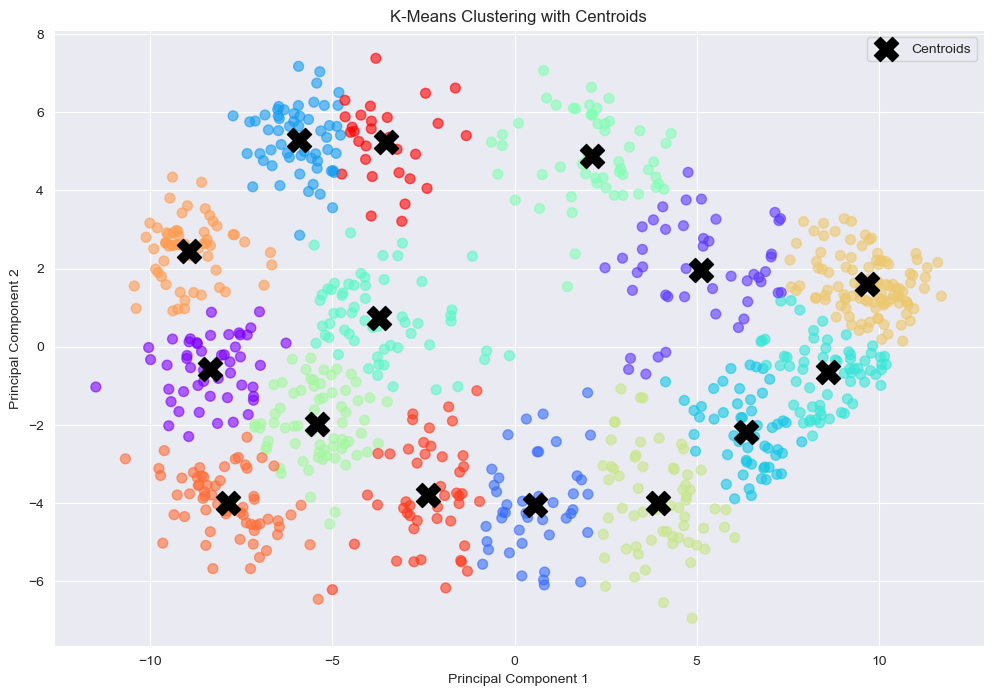

In [275]:
kmeans = KMeans(n_clusters=15)
kmeans_clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(12,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='rainbow', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()

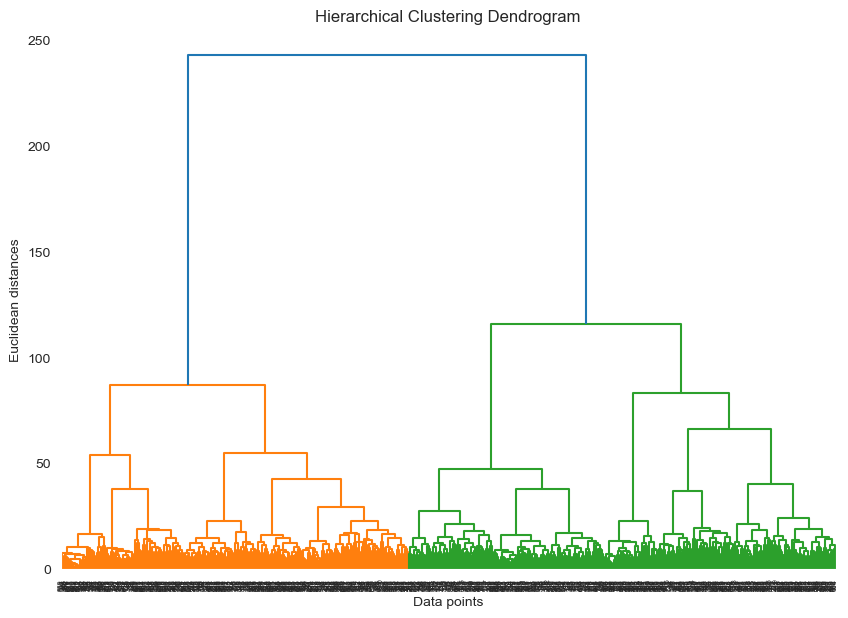

In [276]:
linked = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

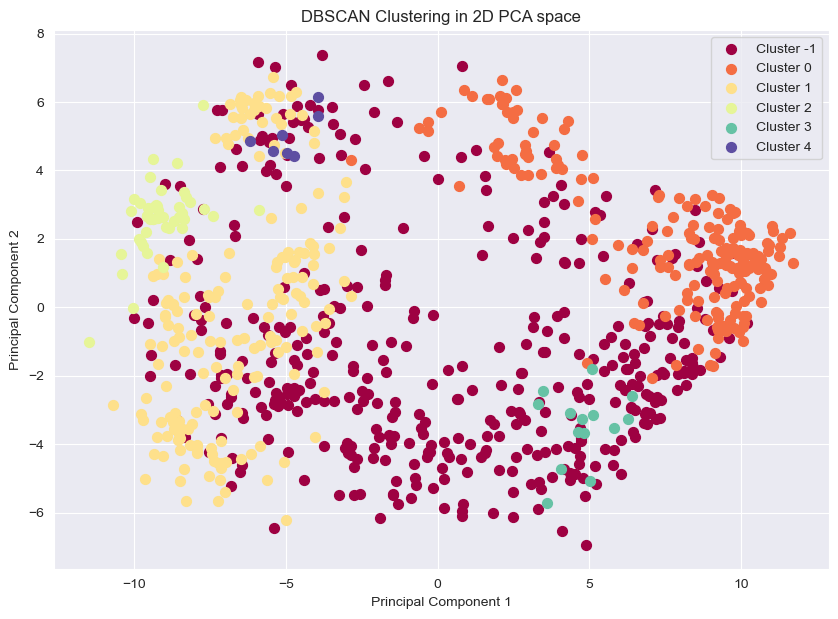

In [277]:
dbscan = DBSCAN(eps=6, min_samples=10)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(10, 7))

unique_clusters = np.unique(clusters)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    cluster_mask = (clusters == cluster)
    plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], s=50, c=[color], label=f"Cluster {cluster}")

plt.title("DBSCAN Clustering in 2D PCA space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()



- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.


In [278]:
def compute_pairwise_difference(df):
    diff_df = pd.DataFrame(index=df.index, columns=df.index)
    for i in df.index:
        for j in df.index:
            diff_df.loc[i, j] = np.abs(df.loc[i].subtract(df.loc[j])).sum()
    return diff_df

numeric_columns = electeddata.drop(columns=['alder', 'navn', 'storkreds']).select_dtypes(include=[np.number]).columns
difference_df = compute_pairwise_difference(electeddata[numeric_columns])

flat_diffs = difference_df.unstack().sort_values(ascending=False)
flat_diffs = flat_diffs[flat_diffs.index.get_level_values(0) != flat_diffs.index.get_level_values(1)]

most_disagreeable_pairs = flat_diffs.head(10)
print("Top 10 Pairs of Elected Candidates with the Highest Disagreements:")
print("-" * 80)
for (candidate_1, candidate_2), value in most_disagreeable_pairs.items():
    candidate_1_name = electeddata.loc[candidate_1, 'navn']
    candidate_2_name = electeddata.loc[candidate_2, 'navn']
    print(f"{candidate_1_name} vs {candidate_2_name}: Total Difference Score = {value:.2f}")


Top 10 Pairs of Elected Candidates with the Highest Disagreements:
--------------------------------------------------------------------------------
Sandra Elisabeth Skalvig vs Peder Hvelplund: Total Difference Score = 141.00
Peder Hvelplund vs Sandra Elisabeth Skalvig: Total Difference Score = 141.00
Karina Lorentzen Dehnhardt vs Ole Birk Olesen: Total Difference Score = 140.00
Steffen Frølund vs Peder Hvelplund: Total Difference Score = 140.00
Ole Birk Olesen vs Karina Lorentzen Dehnhardt: Total Difference Score = 140.00
Henrik Dahl vs Peder Hvelplund: Total Difference Score = 140.00
Peder Hvelplund vs Steffen Frølund: Total Difference Score = 140.00
Peder Hvelplund vs Henrik Dahl: Total Difference Score = 140.00
Peder Hvelplund vs Steffen Larsen: Total Difference Score = 139.00
Sandra Elisabeth Skalvig vs Karina Lorentzen Dehnhardt: Total Difference Score = 139.00


In [279]:
most_agreeable_pairs = flat_diffs.tail(10)
print("\nTop 10 Pairs of Elected Candidates with the Most Agreement:")
print("-" * 80)
for (candidate_1, candidate_2), value in most_agreeable_pairs.items():
    candidate_1_name = electeddata.loc[candidate_1, 'navn']
    candidate_2_name = electeddata.loc[candidate_2, 'navn']
    print(f"{candidate_1_name} and {candidate_2_name}: Total Agreement Score = {value:.2f}")



Top 10 Pairs of Elected Candidates with the Most Agreement:
--------------------------------------------------------------------------------
Pernille Vermund and Kim Edberg: Total Agreement Score = 3.00
Jakob Ellemann-Jensen and Karen Ellemann: Total Agreement Score = 3.00
Kim Edberg and Peter Seier Christensen: Total Agreement Score = 2.00
Trine Bramsen and Rasmus Stoklund: Total Agreement Score = 2.00
Peter Seier Christensen and Kim Edberg: Total Agreement Score = 2.00
Rasmus Stoklund and Trine Bramsen: Total Agreement Score = 2.00
Pernille Vermund and Peter Seier Christensen: Total Agreement Score = 1.00
Lea Wermelin and Rasmus Stoklund: Total Agreement Score = 1.00
Rasmus Stoklund and Lea Wermelin: Total Agreement Score = 1.00
Peter Seier Christensen and Pernille Vermund: Total Agreement Score = 1.00
